In [ ]:
"""
Este programa faz analise inicial dos dados do ENEM 2023

Funcionalidades:
- faz a leitura dos dados do ENEM 2023 limpos no programa 01_enem_2023.ipynb
- cria os seguintes dicionarios para mapear os dados:
    - faixa etária: coluna TP_FAIXA_ETARIA
    - sexo: coluna TP_SEXO
    - estado civil: coluna TP_ESTADO_CIVIL
    - cor/raça: coluna TP_COR_RACA
    - nacionalidade: coluna TP_NACIONALIDADE
    - situação de conclusão do ensino médio: coluna TP_SITUACAO_CONCLUSAO
    - ano de conclusão do ensino médio: coluna TP_ANO_CONCLUIU
    - tipo de escola do ensino médio: coluna TP_ESCOLA
    - tipo de instiuição que concluiu ou concluirá o EM: coluna TP_ENSINO
    - candidato é treineiro: coluna IN_TREINEIRO
    - dependência administrativa da escola: coluna TP_DEPENDENCIA_ADM_ESC
    - localização da escola: coluna TP_LOCALIZACAO_ESC
    - sigla da UF da escola: coluna SG_UF_PROVA

- para cada dicionário foi plotado um histograma para visualização dos dados

"""

'\nEste programa fara analise inicial dos dados do ENEM 2023\n\nEste programa:\n- abrirá o arquivo de dados do ENEM 2023 limpo no formato CSV (enem_2023_100k_clean.csv)\n- fará uma análise inicial dos dados quanto a:\n    - quantidade de linhas\n    - quantidade de colunas\n    - tipos de dados\n- valores faltantes serão excluídos\n- valores do tipo inteiro de 64 bits serão convertidos para inteiros de 8 bits\n- valores do tipo float de 64 bits serão convertidos para inteiros de 16 bits\n\nComo resultado o tamanho do arquivo foi reduzido de 251 MB para 159 MB\n\n'

In [207]:
# Importando bibliotecas
import pandas as pd

# Abrindo o arquivo de dados
df = pd.read_csv('enem_2023_100k_clean.csv', sep=';')

# Verificando se o arquivo foi aberto corretamente
print(df.head(), '\n')

# Verificando a quantidade de linhas e colunas
print(df.shape, '\n')

   TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0                6       M                1            3                 1   
1                7       F                1            1                 1   
2                5       M                1            3                 1   
3               11       F                1            1                 1   
4                3       F                0            3                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                1                4          1          0             0   
1                1                5          1          0             0   
2                1                0          1          0             0   
3                1               10          1          0             0   
4                2                0          2          1             0   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0        NI          

In [208]:
# Configurando pandas para mostrar todas as colunas
pd.set_option('display.max_columns', 76)

# Verificando os tipos de dados de todas as colunas
print(df.dtypes.to_string(), '\n')

TP_FAIXA_ETARIA            int64
TP_SEXO                   object
TP_ESTADO_CIVIL            int64
TP_COR_RACA                int64
TP_NACIONALIDADE           int64
TP_ST_CONCLUSAO            int64
TP_ANO_CONCLUIU            int64
TP_ESCOLA                  int64
TP_ENSINO                  int64
IN_TREINEIRO               int64
SG_UF_ESC                 object
TP_DEPENDENCIA_ADM_ESC     int64
TP_LOCALIZACAO_ESC         int64
NO_MUNICIPIO_PROVA        object
CO_UF_PROVA                int64
SG_UF_PROVA               object
TP_PRESENCA_CN             int64
TP_PRESENCA_CH             int64
TP_PRESENCA_LC             int64
TP_PRESENCA_MT             int64
TP_LINGUA                  int64
Q001                      object
Q002                      object
Q003                      object
Q004                      object
Q005                       int64
Q006                      object
Q007                      object
Q008                      object
Q009                      object
Q010      

In [209]:
# imprimindo o tamanho da memória ocupada pelo dataframe df em Mb com duas casas decimais
print(f'Memória ocupada pelo dataframe df: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB\n')

Memória ocupada pelo dataframe df: 170.58 MB



In [210]:
# convertendo valores int64 para int8
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# imprime os tipos de dados de todas as colunas
print(df.dtypes.to_string(), '\n')

# imprimindo o tamanho da memória ocupada pelo dataframe df em Mb com duas casas decimais
print(f'Memória ocupada pelo dataframe df: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB\n')

TP_FAIXA_ETARIA             int8
TP_SEXO                   object
TP_ESTADO_CIVIL             int8
TP_COR_RACA                 int8
TP_NACIONALIDADE            int8
TP_ST_CONCLUSAO             int8
TP_ANO_CONCLUIU             int8
TP_ESCOLA                   int8
TP_ENSINO                   int8
IN_TREINEIRO                int8
SG_UF_ESC                 object
TP_DEPENDENCIA_ADM_ESC      int8
TP_LOCALIZACAO_ESC          int8
NO_MUNICIPIO_PROVA        object
CO_UF_PROVA                 int8
SG_UF_PROVA               object
TP_PRESENCA_CN              int8
TP_PRESENCA_CH              int8
TP_PRESENCA_LC              int8
TP_PRESENCA_MT              int8
TP_LINGUA                   int8
Q001                      object
Q002                      object
Q003                      object
Q004                      object
Q005                        int8
Q006                      object
Q007                      object
Q008                      object
Q009                      object
Q010      

In [211]:
# Verificando os valores faltantes
print('Valores faltantes por coluna: \n')
print(df.isnull().sum(), '\n')

Valores faltantes por coluna: 

TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
SG_UF_ESC                 0
TP_DEPENDENCIA_ADM_ESC    0
TP_LOCALIZACAO_ESC        0
NO_MUNICIPIO_PROVA        0
CO_UF_PROVA               0
SG_UF_PROVA               0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
TP_LINGUA                 0
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                      0
Q011                      0
Q012                      0
Q013                      0
Q014            

In [212]:
# Verificando os valores unicos da coluna 'TP_FAIXA_ETARIA'
print('Valores únicos da coluna "TP_FAIXA_ETARIA": \n')
print(df['TP_FAIXA_ETARIA'].unique(), '\n')

Valores únicos da coluna "TP_FAIXA_ETARIA": 

[ 6  7  5 11  3 13  2 14  4  1 15 12 10  8  9 16 17 18 19 20] 



In [213]:
# Criando um dicionário para mapear os valores da coluna 'TP_FAIXA_ETARIA'
faixa_etaria = {
    1: '< 17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: '26 < 30',
    12: '31 < 35',
    13: '36 < 40',
    14: '41 < 45',
    15: '46 < 50',
    16: '51 < 55',
    17: '56 < 60',
    18: '61 < 65',
    19: '66 < 70',
    20: '> 70'
}

# Criando uma lista de tamanho 20 inciada com valores iguais a zero
faixa_etaria_count = [0] * 20

# Contando a quantidade de pessoas por faixa etária
for i in range(1, 21):
    faixa_etaria_count[i - 1] = df[df['TP_FAIXA_ETARIA'] == i].shape[0]

# Imprimindo a quantidade de pessoas por faixa etária
print('Quantidade de pessoas por faixa etária: \n')
for i in range(20):
    print(f'{faixa_etaria[i + 1]}: {faixa_etaria_count[i]}')

Quantidade de pessoas por faixa etária: 

< 17: 8912
17: 19086
18: 23119
19: 11092
20: 6751
21: 4675
22: 3437
23: 2916
24: 2326
25: 1899
26 < 30: 6225
31 < 35: 3305
36 < 40: 2373
41 < 45: 1672
46 < 50: 1021
51 < 55: 642
56 < 60: 336
61 < 65: 136
66 < 70: 52
> 70: 25


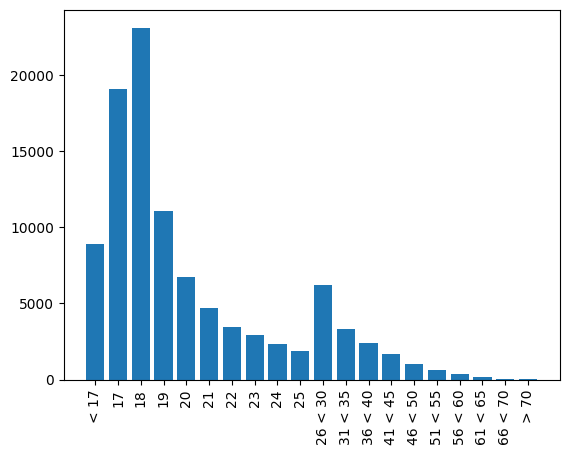

In [ ]:
# Plotando um histograma da quantidade de pessoas por faixa etária
import matplotlib.pyplot as plt

plt.bar(faixa_etaria.values(), faixa_etaria_count)
plt.xticks(rotation=90)
plt.show()


In [215]:
# Criando um dicionário para mapear os valores da coluna 'TP_SEXO'
sexo = {
    'F': 'Feminino',
    'M': 'Masculino',
}

# Criando um dicionário para mapear os valores da coluna 'TP_ESTADO_CIVIL'
estado_civil = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Mora com companheiro(a)',
    3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
    4: 'Viúvo(a)'
}

# Criando um dicionário para mapear os valores da coluna 'TP_COR_RACA'
cor_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

# Criando um dicionário para mapear os valores da coluna 'TP_NACIONALIDADE'
nacionalidade = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a), nascido(a) no exterior'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ST_CONCLUSAO'
st_conclusao = {
    1: 'Já concluí o Ensino Médio',
    2: 'Estou cursando e concluirei o Ensino Médio em 2023',
    3: 'Estou cursando e concluirei o Ensino Médio após 2023',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ANO_CONCLUIU'
ano_concluiu = {
    0: 'Não informado',
    1: '2022',
    2: '2021',
    3: '2020',
    4: '2019',
    5: '2018',
    6: '2017',
    7: '2016',
    8: '2015',
    9: '2014',
    10: '2013',
    11: '2012',
    12: '2011',
    13: '2010',
    14: '2009',
    15: '2008',
    16: '2007',
    17: '< 2007'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ESCOLA'
escola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ENSINO'
ensino = {
    0: 'Não Informado', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Regular',
    2: 'Educação Especial - Modalidade Substitutiva'
}

# Criando um dicionário para mapear os valores da coluna 'IN_TREINEIRO'
treineiro = {
    0: 'Não',
    1: 'Sim'
}

# Criando um dicionário para mapear os valores da coluna 'TP_DEPENDENCIA_ADM_ESC'
dependencia_adm_esc = {
    0: 'Não Informado', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

# Criando um dicionário para mapear os valores da coluna 'TP_LOCALIZACAO_ESC'
localizacao_esc = {
    0: 'Não Informado', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Urbana',
    2: 'Rural'
}

# Criando um dicionário para mapear os estados do Brasil
uf_brasil = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins',
    'NI': 'Não Informado' # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
}

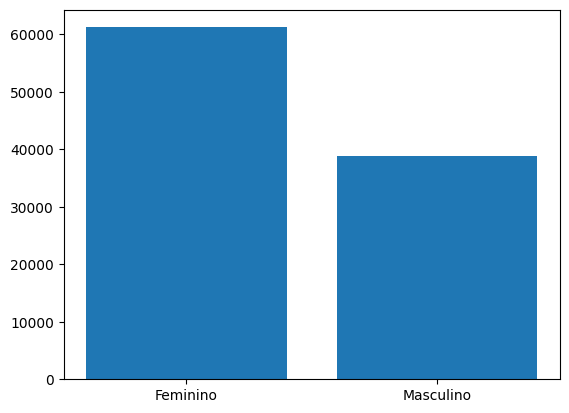

In [216]:
# Plotando histogramas para as colunas 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO'
# 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'SG_UF_ESC'

# Plotando histograma para a coluna 'TP_SEXO'
sexo_count = [0] * 2
for i in range(2):
    sexo_count[i] = df[df['TP_SEXO'] == list(sexo.keys())[i]].shape[0]

plt.bar(sexo.values(), sexo_count)
plt.show()


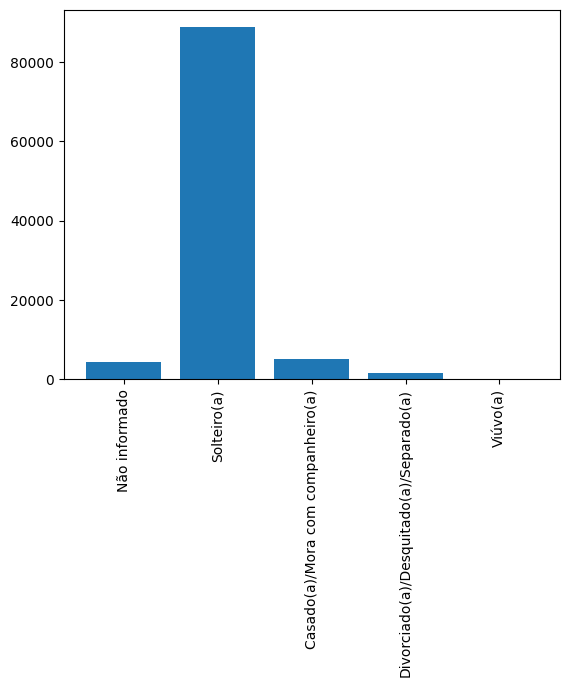

In [217]:
# Plotando histograma para a coluna 'TP_ESTADO_CIVIL'
estado_civil_count = [0] * 5
for i in range(5):
    estado_civil_count[i] = df[df['TP_ESTADO_CIVIL'] == list(estado_civil.keys())[i]].shape[0]

plt.bar(estado_civil.values(), estado_civil_count)
plt.xticks(rotation=90)
plt.show()

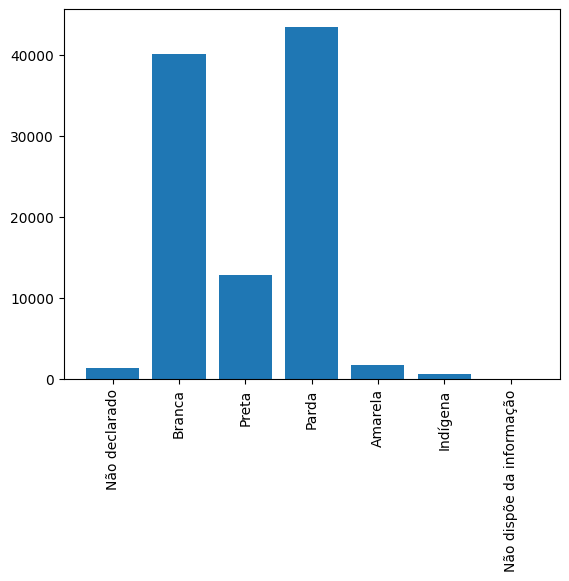

In [ ]:
# Plotando histograma para a coluna 'TP_COR_RACA'

cor_raca_count = [0] * 7
for i in range(6):
    cor_raca_count[i] = df[df['TP_COR_RACA'] == list(cor_raca.keys())[i]].shape[0]

plt.bar(cor_raca.values(), cor_raca_count)
plt.xticks(rotation=90)
plt.show()


'''
Questoes a serem explordas:
- distribuição da raça: por estado, por faixa etária, por sexo
- análise proporcional da raça: por estado, por faixa etária, por sexo

'''



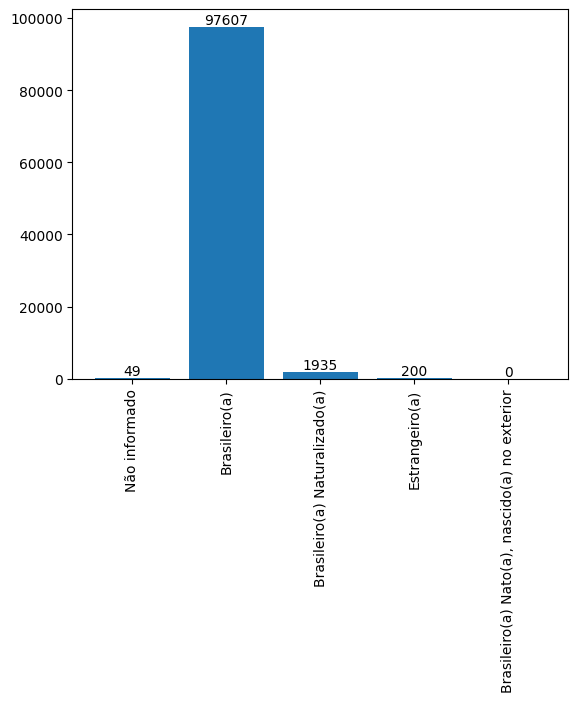

In [219]:
# Plotando histograma para a coluna 'TP_NACIONALIDADE'
nacionalidade_count = [0] * 5
for i in range(4):
    nacionalidade_count[i] = df[df['TP_NACIONALIDADE'] == list(nacionalidade.keys())[i]].shape[0]

plt.bar(nacionalidade.values(), nacionalidade_count)
# Incluindo o número de pessoas em cima da barra
for i in range(5):
    # Parametros: posição x, posição y, texto, alinhamento horizontal, alinhamento vertical
    plt.text(i, nacionalidade_count[i], nacionalidade_count[i], ha='center', va='bottom')
    plt.xticks(rotation=90)
plt.show()




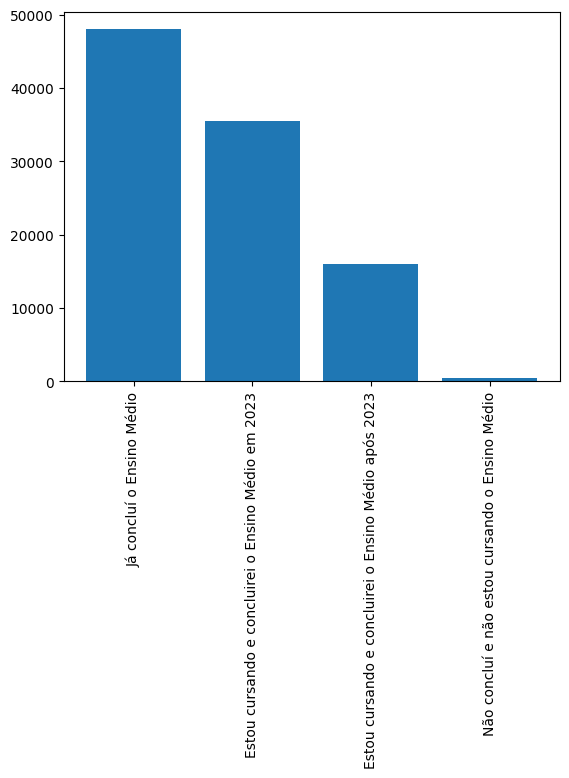

In [220]:
# Plotando histograma para a coluna 'TP_ST_CONCLUSAO'
st_conclusao_count = [0] * 4
for i in range(4):
    st_conclusao_count[i] = df[df['TP_ST_CONCLUSAO'] == list(st_conclusao.keys())[i]].shape[0]

plt.bar(st_conclusao.values(), st_conclusao_count)
plt.xticks(rotation=90)
plt.show()


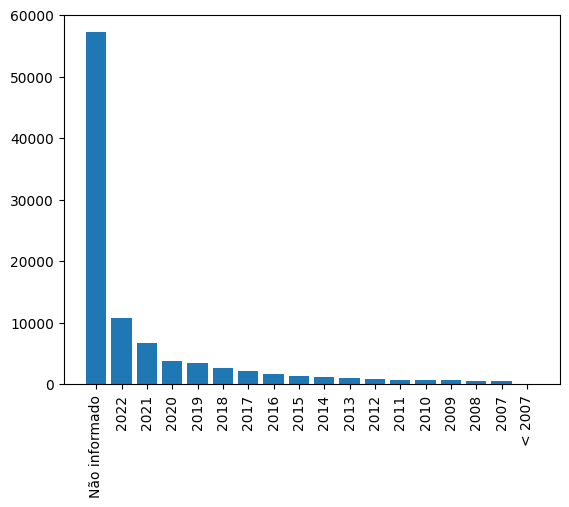

In [221]:
# Plotando histograma para a coluna 'TP_ANO_CONCLUIU'
ano_concluiu_count = [0] * 18
for i in range(17):
    ano_concluiu_count[i] = df[df['TP_ANO_CONCLUIU'] == list(ano_concluiu.keys())[i]].shape[0]

plt.bar(ano_concluiu.values(), ano_concluiu_count)
plt.xticks(rotation=90)
plt.show()


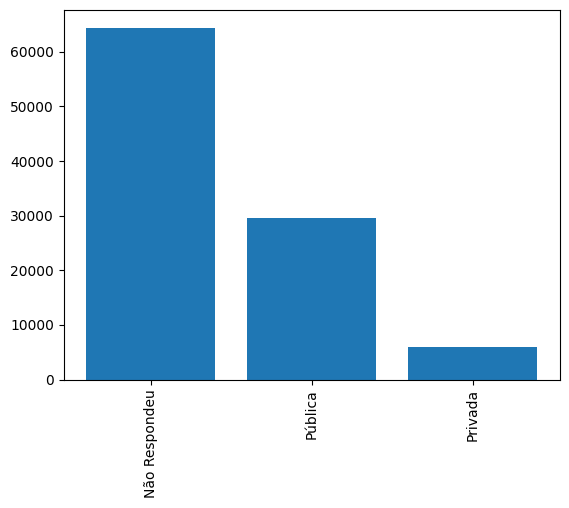

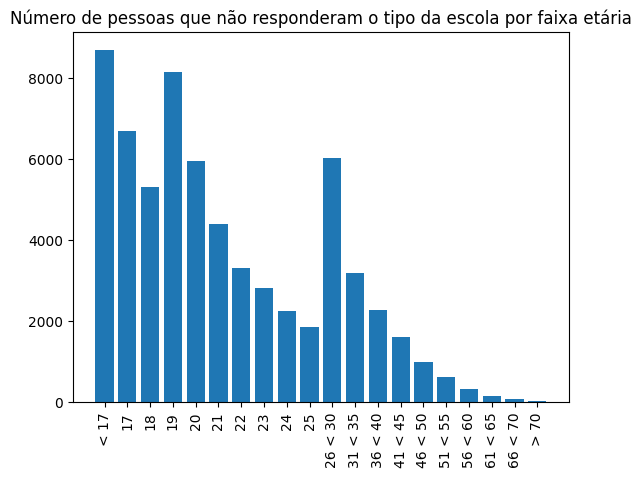

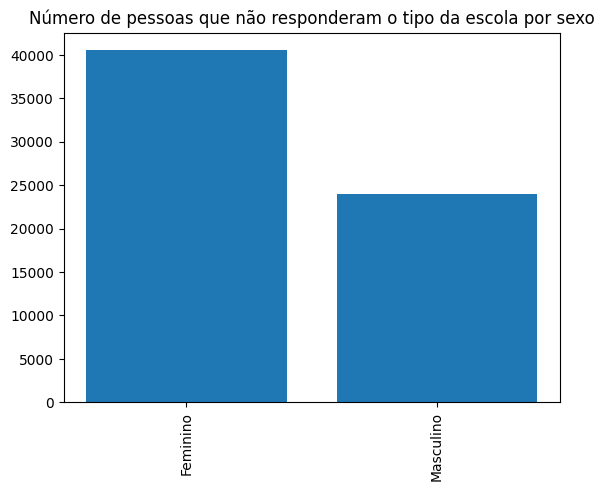

In [222]:
# Plotando histograma para a coluna 'TP_ESCOLA'
escola_count = [0] * 3
for i in range(3):
    escola_count[i] = df[df['TP_ESCOLA'] == list(escola.keys())[i]].shape[0]

plt.bar(escola.values(), escola_count)
plt.xticks(rotation=90)
plt.show()

# Plotando um histograma do número de pessoas que não responderam o tipo da escola por faixa etária
escola_count = [0] * 20
for i in range(20):
    escola_count[i] = df[(df['TP_ESCOLA'] == 1) & (df['TP_FAIXA_ETARIA'] == i + 1)].shape[0]

plt.bar(faixa_etaria.values(), escola_count)
plt.title('Número de pessoas que não responderam o tipo da escola por faixa etária')
plt.xticks(rotation=90)
plt.show()




# Plotando o histograma do número de pessoas que não responderam o tipo da escola por sexo
escola_count = [0] * 2
for i in range(2):
    escola_count[i] = df[(df['TP_ESCOLA'] == 1) & (df['TP_SEXO'] == list(sexo.keys())[i])].shape[0]

plt.bar(sexo.values(), escola_count)
plt.title('Número de pessoas que não responderam o tipo da escola por sexo')
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Plotando histograma para a coluna 'TP_ENSINO'

# Verificando os valores únicos da coluna 'TP_ENSINO'
print('Valores únicos da coluna "TP_ENSINO": \n')
print(df['TP_ENSINO'].unique(), '\n')

ensino_count = [0] * 3
for i in range(3):
    ensino_count[i] = df[df['TP_ENSINO'] == list(ensino.keys())[i]].shape[0]

plt.bar(ensino.values(), ensino_count)
# Incluindo o número de pessoas em cima da barra
for i in range(3):
    # Parametros: posição x, posição y, texto, alinhamento horizontal, alinhamento vertical
    plt.text(i, ensino_count[i], ensino_count[i], ha='center', va='bottom')
    plt.xticks(rotation=90)
plt.show()


Valores únicos da coluna "TP_ENSINO": 



NameError: name 'df' is not defined

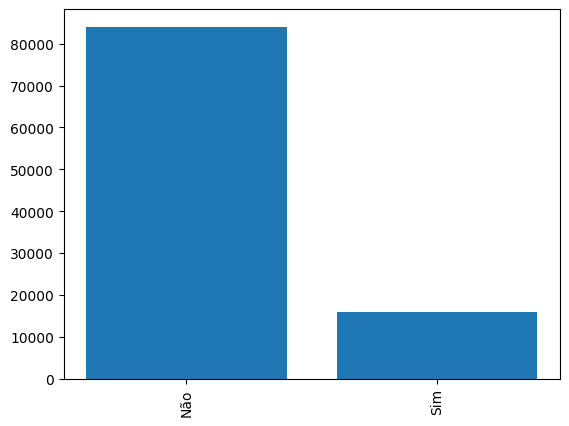

In [224]:
# Plotando histograma para a coluna 'IN_TREINEIRO'
treineiro_count = [0] * 2
for i in range(2):
    treineiro_count[i] = df[df['IN_TREINEIRO'] == list(treineiro.keys())[i]].shape[0]

plt.bar(treineiro.values(), treineiro_count)
plt.xticks(rotation=90)
plt.show()


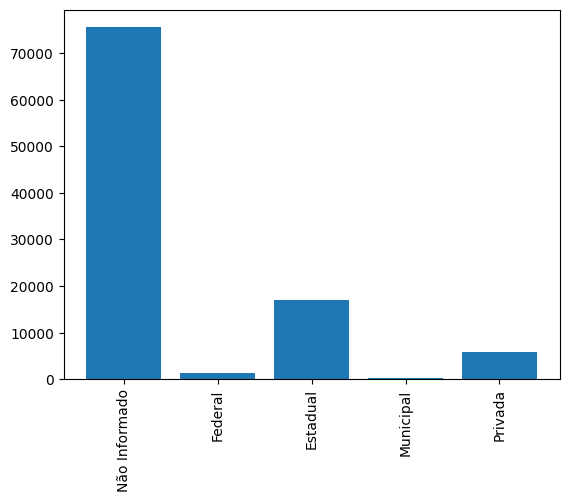

In [225]:
# Plotando histograma para a coluna 'TP_DEPENDENCIA_ADM_ESC'
dependencia_adm_esc_count = [0] * 5
for i in range(5):
    dependencia_adm_esc_count[i] = df[df['TP_DEPENDENCIA_ADM_ESC'] == list(dependencia_adm_esc.keys())[i]].shape[0]

plt.bar(dependencia_adm_esc.values(), dependencia_adm_esc_count)
plt.xticks(rotation=90)
plt.show()


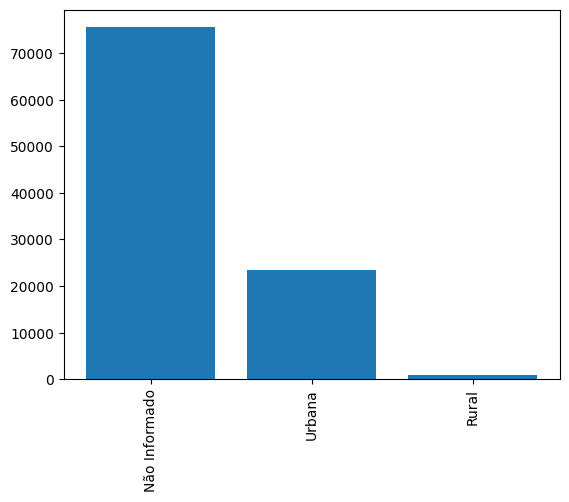

In [ ]:
# Plotando histograma para a coluna 'TP_LOCALIZACAO_ESC'
localizacao_esc_count = [0] * 3
for i in range(3):
    localizacao_esc_count[i] = df[df['TP_LOCALIZACAO_ESC'] == list(localizacao_esc.keys())[i]].shape[0]

plt.bar(localizacao_esc.values(), localizacao_esc_count)
plt.xticks(rotation=90)
plt.show()

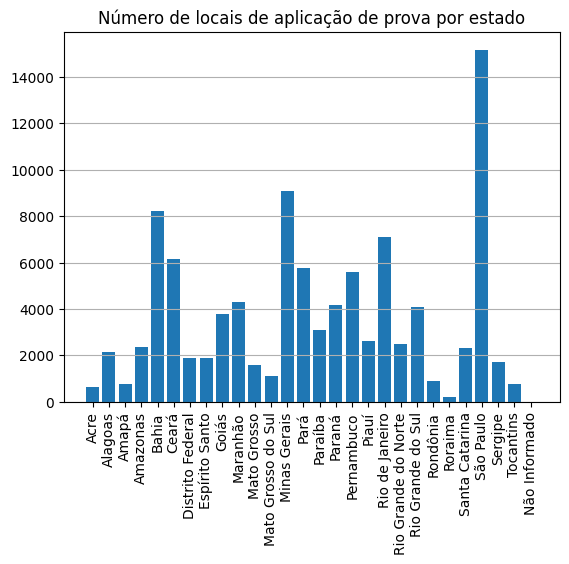

In [ ]:
# Plotando histograma para a coluna 'SG_UF_PROVA'
uf_esc_count = [0] * 28
for i in range(28):
    uf_esc_count[i] = df[df['SG_UF_PROVA'] == list(uf_brasil.keys())[i]].shape[0]

plt.bar(uf_brasil.values(), uf_esc_count)
plt.title('Número de locais de aplicação de prova por estado')
# Plotando grades no eixo y
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()